## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
# 필요한 패키지 임포트

import warnings
warnings.filterwarnings('ignore') # 경고 문구 없애기

import pandas as pd
import requests



#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [3]:
# 어떤 url에서 가져와야 좋을지 이 과정에서 크롬 개발자 도구를 사용할 것

# page, page_size = 1, 10
# url = 'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
# url

page, page_size = 1, 10 
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}' 
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [5]:
# JSON 포맷의 문자열 데이터로 받아올 것
# 요청한다! 그리고 보내주는 것을 받아오는 게 리스폰스 객체

response = requests.get(url)
response

# 200이 정상적으로 받아왔다는 상태 코드임

<Response [200]>

In [8]:
# 요청해서 받아오고, 이 문자열이 리스폰스 안에 들어있는데 어떤 게 들어있는지 확인하고 싶으면

# response.text
response.text[:300] # 지금은 dtype이 string
# 그래서 df로 바꾸기 위해 파싱 과정을 거쳐야 함

'[{"localTradedAt":"2023-02-16","closePrice":"2,473.46","compareToPreviousClosePrice":"45.56","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.88","openPrice":"2,444.06","highPrice":"2,474.62","lowPrice":"2,442.07"},{"localTradedAt":"2023-02-15","closePrice":"2'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [9]:
# 일단 타입 확인
type(response)






requests.models.Response

In [11]:
# 리스폰스 클래스 안에는 다양한 좋은 함수들이 있음
data = response.json() # 위에 문자열을 제이슨이란 메서드를 활용해서 리스트로 바꿔줌
data # 리스트 안에 딕셔너리가 있는 포맷임... 딕셔너리 데이터 하나 = row 데이터 

[{'localTradedAt': '2023-02-16',
  'closePrice': '2,473.46',
  'compareToPreviousClosePrice': '45.56',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '1.88',
  'openPrice': '2,444.06',
  'highPrice': '2,474.62',
  'lowPrice': '2,442.07'},
 {'localTradedAt': '2023-02-15',
  'closePrice': '2,427.90',
  'compareToPreviousClosePrice': '-37.74',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-1.53',
  'openPrice': '2,473.09',
  'highPrice': '2,473.44',
  'lowPrice': '2,424.16'},
 {'localTradedAt': '2023-02-14',
  'closePrice': '2,465.64',
  'compareToPreviousClosePrice': '12.94',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.53',
  'openPrice': '2,471.33',
  'highPrice': '2,480.34',
  'lowPrice': '2,459.83'},
 {'localTradedAt': '2023-02-13',
  'closePrice': '2,452.70',
  'compareToPreviousClosePrice': '-17.03',
  'compareToPreviousPri

In [12]:
# 딕셔너리 -> df 
df = pd.DataFrame(data)
df

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2023-02-16,"2,473.46",45.56,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.88,"2,444.06","2,474.62","2,442.07"
1,2023-02-15,"2,427.90",-37.74,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.53,"2,473.09","2,473.44","2,424.16"
2,2023-02-14,"2,465.64",12.94,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.53,"2,471.33","2,480.34","2,459.83"
3,2023-02-13,"2,452.70",-17.03,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.69,"2,461.96","2,462.58","2,440.86"
4,2023-02-10,"2,469.73",-11.79,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.48,"2,470.65","2,473.80","2,454.74"
5,2023-02-09,"2,481.52",-2.12,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.09,"2,470.66","2,487.14","2,466.61"
6,2023-02-08,"2,483.64",31.93,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.30,"2,469.42","2,487.35","2,465.96"
7,2023-02-07,"2,451.71",13.52,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.55,"2,440.14","2,456.17","2,432.40"
8,2023-02-06,"2,438.19",-42.21,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.70,"2,461.82","2,469.42","2,438.04"
9,2023-02-03,"2,480.40",11.52,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.47,"2,466.54","2,485.08","2,460.21"


In [13]:
# 원하는 것만 가져오기
df = pd.DataFrame(data)[['localTradedAt', 'closePrice']]
df

,localTradedAt,closePrice
0,2023-02-16,"2,473.46"
1,2023-02-15,"2,427.90"
2,2023-02-14,"2,465.64"
3,2023-02-13,"2,452.70"
4,2023-02-10,"2,469.73"
5,2023-02-09,"2,481.52"
6,2023-02-08,"2,483.64"
7,2023-02-07,"2,451.71"
8,2023-02-06,"2,438.19"
9,2023-02-03,"2,480.40"


#### 4. 함수로 만들기

In [14]:
# def stock_price(code, page, page_size):
def stock_price(code = 'KOSPI', page = 1, page_size = 20): # default 설정 naver는 page 수 60개 제한 있음 지금
    ''' This function is crawling stock price form naver. # 함수 설명
    params: # 파라미터
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return: # 함수를 실행했을 때 나오는 데이터 타입
        type : DataFrame
    ''' # 독스트링
    # 1. URL
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}' 

    # 2. request(URL) > response : 받아지는 것은 json(str)
    response = requests.get(url)
    
    # 3. json(str) > list, dict > DataFrame
    data = response.json()
    # 두개의 컬럼만 선택해서 리턴
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]


In [17]:
# 1번째 페이지의 20개의 데이터를 가져오고 싶다
df = stock_price('KOSDAQ', 1, 20)
# df
df.tail()

,localTradedAt,closePrice
15,2023-01-26,738.94
16,2023-01-25,732.35
17,2023-01-20,717.97
18,2023-01-19,712.89
19,2023-01-18,711.75


In [18]:
# 독스트링 볼 수 있음 >> 함수를 어떻게 사용하는지 
# 아니면 함수 이름 위에 마우스 호버하거나
# 함수 이름치고 shift + tab 누르면 어떻게 쓰는지 보여줌
help(stock_price)

Help on function stock_price in module __main__:

stock_price(code, page, page_size)
    This function is crawling stock price form naver. # 함수 설명
    params: # 파라미터
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return: # 함수를 실행했을 때 나오는 데이터 타입
        type : DataFrame



In [20]:
print('a', 'b', sep = ',') # sep 는 공백 대신 , 넣겠다 
# end = '역슬래쉬 t'는 개행하지 않고 탭으로 하겠다

a,b


In [21]:
type(response)

requests.models.Response

In [23]:
# __는 스페셜 메소드
# 객체에서 쓸 수 있는 메소드를 보고 싶으면 dir
dir(response)


['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [25]:
# 스페셜 메소드를 제외하고 보고 싶을 때! 
[var for var in dir(response) if var[0] !='_']

['apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

#### 5. 원달러 환율 데이터 수집 : 실습

In [39]:
def exchange_rate(code = 'FX_USDKRW', page = 1):
  # 1. URL 모바일, 웹 환경 상관없는데 모바일 환경이 간결해서 좀 더 쉬움
  url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode={code}'
  # 2. request(URL) > response(json(str))
  response = requests.get(url)
  
  
  # 3. json(str) > List, dict > DataFrame
  data = response.json()['result']
  return pd.DataFrame(data)[['localTradedAt', 'closePrice']]
  

In [58]:
usd_1 = exchange_rate(page = 1)
usd_2 = exchange_rate(page = 2)
usd_df = pd.concat([usd_1, usd_2], ignore_index=True) # ignore_index 하면 정렬됨
usd_df

,localTradedAt,closePrice
0,2023-02-16,"1,281.60"
1,2023-02-15,"1,289.00"
2,2023-02-14,"1,270.00"
3,2023-02-13,"1,279.00"
4,2023-02-10,"1,270.50"
5,2023-02-09,"1,259.00"
6,2023-02-08,"1,260.00"
7,2023-02-07,"1,262.00"
8,2023-02-06,"1,258.00"
9,2023-02-03,"1,251.00"


## 코스피 데이터 가져오기

In [45]:
kospi_df = stock_price('KOSPI', 1, 20)
kospi_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,"2,380.34"
19,2023-01-18,"2,368.32"


## 코스닥 데이터 가져오기

In [49]:
kosdaq_df = stock_price('KOSDAQ', 2, 20)
kosdaq_df.tail(2)

,localTradedAt,closePrice
18,2022-12-21,705.70
19,2022-12-20,703.13


#### 6. 시각화

### 데이터 전처리 먼저... 수치형이 아니면 시각화가 안될 수 있음


In [53]:
usd_df['closePrice'] # 콤마가 붙어서 나옴...

0     1,282.60
1     1,289.00
2     1,270.00
3     1,279.00
4     1,270.50
5     1,259.00
6     1,260.00
7     1,262.00
8     1,258.00
9     1,251.00
10    1,227.00
11    1,231.50
12    1,236.00
13    1,230.00
14    1,235.00
15    1,234.50
16    1,236.50
17    1,240.00
18    1,237.00
19    1,230.00
Name: closePrice, dtype: object

내가 쓴거

In [59]:
# 데이터 전처리 : 데이터 타입 변경
# 숫자에 , 콤마가 있으면 수치형이 아님 콤마 제거해 주자
usd_df['usd'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',', ''))) # apply 쓰면 괄호 안에 적힌 함수를 모든 요소에 적용됨: 람다 함수 >> ','를 '' 아무것도 없는걸로 바꿈
# 콤마가 있는데 astype 쓰면 error남 근데 걍 그러지 말고 앞에 float 부여주셈
usd_df.dtypes
# 다시 실행하면 이미 콤마가 제거된 상태인데 한 번 더 실행해서 없애줄 수가 없어서 에러나는겨

localTradedAt     object
closePrice        object
usd              float64
dtype: object

강사님이 쓴거

In [60]:
# 데이터 전처리 : 데이터 타입 변경 
usd_1 = exchange_rate(page=1) 
usd_2 = exchange_rate(page=2) 
usd_df = pd.concat([usd_1, usd_2], ignore_index=True) 
usd_df['usd'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',', ''))) 
usd_df.tail(2)

,localTradedAt,closePrice,usd
18,2023-01-19,"1,237.00",1237.0
19,2023-01-18,"1,230.00",1230.0


강사님이 쓴거

In [63]:
kospi_df, kosdaq_df = stock_price('KOSPI', 1, 20), stock_price('KOSDAQ', 1, 20)
kospi_df['kospi'] = kospi_df['closePrice'].apply(lambda data: float(data.replace(',', ''))) 
kosdaq_df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',', '')))

In [65]:
kospi_df.dtypes

localTradedAt     object
closePrice        object
kospi            float64
dtype: object

In [64]:
kosdaq_df.dtypes

localTradedAt     object
closePrice        object
kosdaq           float64
dtype: object

4개의 컬럼이 있는 데이터 프레임 만들기

In [68]:
df = usd_df.copy() # 깊은 복사가 들어가는?
df['kospi'] = kospi_df['kospi'] # 카피한 df에 열을 추가해서 거기 코스피디에프의 코스피열을 복사?
df['kosdaq'] = kosdaq_df['kosdaq'] 
df = df.drop(columns=['closePrice'])
df.tail(2)


,localTradedAt,usd,kospi,kosdaq
18,2023-01-19,1237.0,2380.34,712.89
19,2023-01-18,1230.0,2368.32,711.75


# 파이썬 기본 문법

### 람다를 사용하는 이유, 사용하는 방법

In [69]:
# lambda : 파라미터와 리턴으로 이루어진 함수를 간단하게 작성하는 방법

# 함수 3개 선언 > 저장공간 3칸 사용
def plus(n1, n2) :
  return n1 + n2
def minus(n1, n2):
  return n1 - n2
def calc(func, n1, n2):
  return func(n1, n2)

In [70]:
calc(plus, 1, 2)

3

In [71]:
plus_lambda = lambda n1, n2: n1 + n2 # n1, n2 : n1 + n2 >>>>> 인자 : 리턴
plus_lambda(1, 2)

3

장점은 뭘까? 
- 위에서는 저장공간 3칸을 썼음
- 람다를 쓰면 함수가 들어가는 부분에 함수를 선언하지 않고 람다를 넣어주면 그냥 3이 나옴
- 코드 가독성도 좋아지고
- 저장공간 3칸 쓸걸 한칸이면 됨

In [74]:
calc(lambda n1, n2: n1+n2, 1, 2), calc(lambda n1, n2: n1 - n2, 1, 2) # 위의 칼크 함수랑 같음;; 

(3, -1)

# 얕은 복사와 깊은 복사

In [75]:
# 얕은 복사
data1 = [1,2,3]
data2 = data1
print(data1, data2)
data2[1] = 4
print(data1, data2) # data2만 바꿨는데 data1도 바뀜.


[1, 2, 3] [1, 2, 3]
[1, 4, 3] [1, 4, 3]


In [76]:
# 깊은 복사 >> .copy()
data1 = [1, 2, 3] 
data2 = data1 # 얕은 복사 : 주소복사
data3 = data1.copy() # 깊은 복사 : 데이터복사
print(data1, data2, data3) 
data1[1] = 4 
print(data1, data2, data3)

[1, 2, 3] [1, 2, 3] [1, 2, 3]
[1, 4, 3] [1, 4, 3] [1, 2, 3]


In [77]:
# 주소값 보기
id(data1), id(data2), id(data3)

(2115107933824, 2115107933824, 2115100627712)

# 본격적인 시각화

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-01-19,1237.0,2380.34,712.89
19,2023-01-18,1230.0,2368.32,711.75


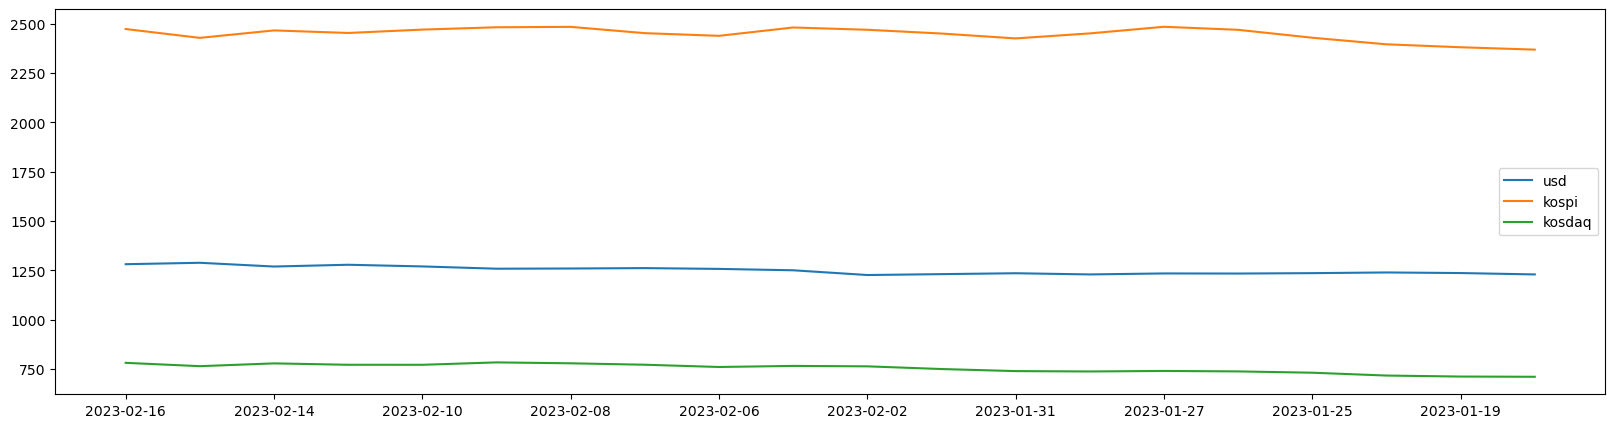

In [85]:
plt.figure(figsize=(20, 5))

plt.plot(df['localTradedAt'], df['usd'], label='usd')
plt.plot(df['localTradedAt'], df['kospi'], label='kospi')
plt.plot(df['localTradedAt'], df['kosdaq'], label='kosdaq')

plt.xticks(df['localTradedAt'][::2])
plt.legend()

plt.show() 

In [84]:
# xticks 데이터 수정함 왜냐? 길어서 짤리니까.
df['localTradedAt'][::2] # 전체 데이터 갯수에서 2개씩 점프에서 출력하겠다

0     2023-02-16
2     2023-02-14
4     2023-02-10
6     2023-02-08
8     2023-02-06
10    2023-02-02
12    2023-01-31
14    2023-01-27
16    2023-01-25
18    2023-01-19
Name: localTradedAt, dtype: object

#### 서로 스케일이 다르기 때문에 3개의 데이터를 비교하기가 힘들다.
- 이럴 땐 유사한 스케일로 바꿔줘야 한다. 이것이 바로 데이터 스케일링

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

민맥스스케일링은 딥러닝에서 굉장히 많이 사용하는 방법
이 수식을 보면 최소값 - 최소값을 하면 0이 나옴 최소값은 0이 나옴. 최댓값은 1이 나옴
그래서 0과 1 사이의 값밖에 안 나옴 
딥러닝에서 굉장히 많이 사용함

In [93]:
# 민맥스 스케일링을 직접 구현할 수도 있지만 이미 구현되어 있는 코드가 있음 ㅋ 임포트 ㄱㄱ
from sklearn.preprocessing import minmax_scale

In [97]:
minmax_scale(df['usd'])

array([0.88387097, 1.        , 0.69354839, 0.83870968, 0.7016129 ,
       0.51612903, 0.53225806, 0.56451613, 0.5       , 0.38709677,
       0.        , 0.07258065, 0.14516129, 0.0483871 , 0.12903226,
       0.12096774, 0.15322581, 0.20967742, 0.16129032, 0.0483871 ])

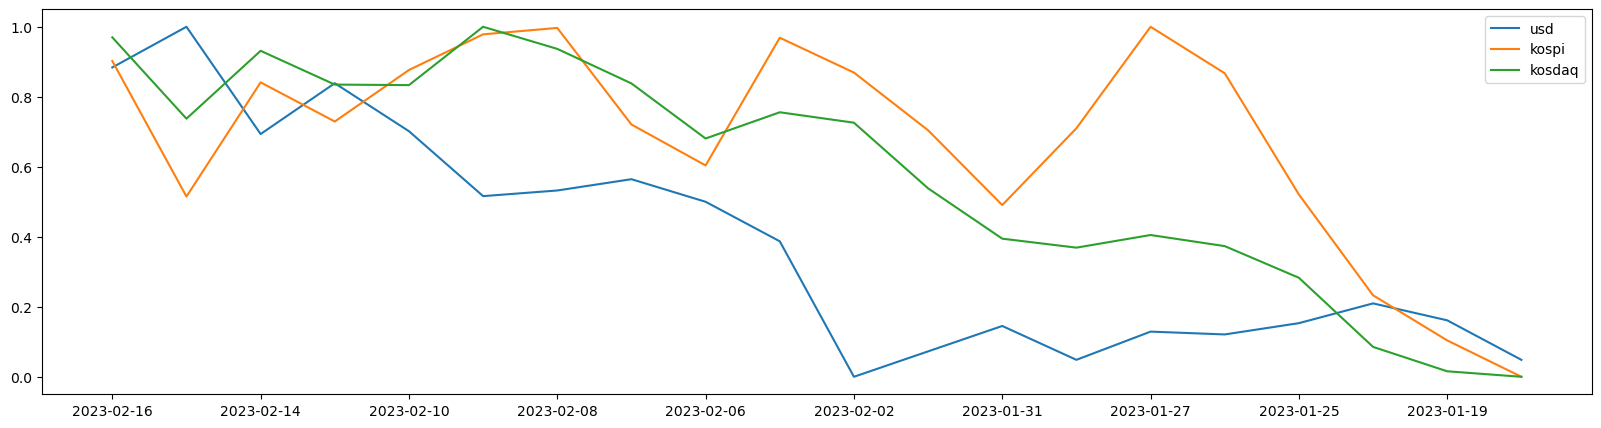

In [95]:
plt.figure(figsize=(20, 5)) 
plt.plot(df['localTradedAt'], minmax_scale(df['usd']), label='usd') 
plt.plot(df['localTradedAt'], minmax_scale(df['kospi']), label='kospi') 
plt.plot(df['localTradedAt'], minmax_scale(df['kosdaq']), label='kosdaq') 
plt.xticks(df['localTradedAt'][::2]) 
plt.legend() 
plt.show()

코스피가 떨어질땐 환율은 올라가고 코스닥은 떨어졌네... 이런 결론 볼 수 있음

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임 
    - 1에 가까울수록 서로 같은방향으로 움직임 # 양의 상관관계
    - 0에 가까울수록 두 데이터는 관계가 없음 

In [98]:
df.corr()

,usd,kospi,kosdaq
usd,1.000000,0.295353,0.720466
kospi,0.295353,1.000000,0.780177
kosdaq,0.720466,0.780177,1.000000


In [ ]:
# usd - kospi : -0.5 환율이 높아지면 코스피가 떨어진다? 낮다?  >>> 달러값 오를수록 코스피가 떨어진다.
# kosdaq - kospi : 0.9 코스닥이 높으면 코스피도 같이 높다